# Data Analysis Module
## PERSUADE 2.0 Dataset Notebook

This module is in charge of data analysis for the project, including the raw dataset and scored counterfactuals.

### Dataset analysis:

In [280]:
import pandas as pd

# load df
df = pd.read_csv("persuade/cleaned_persuade.csv")
print("Shape:", df.shape)
df

Shape: (25078, 5)


,essay_id_comp,full_text,holistic_essay_score,word_count,prompt_name
0,423A1CA112E2,phones\n\nmodern humans today are always on th...,3,378,Phones and driving
1,BC75783F96E3,this essay will explain if drivers should or s...,4,432,Phones and driving
2,74C8BC7417DE,driving while the use of cellular devices\n\nt...,2,179,Phones and driving
3,A8445CABFECE,phones & driving\n\ndrivers should not be able...,3,221,Phones and driving
4,6B4F7A0165B9,cell phone operation while driving\n\nthe abil...,4,334,Phones and driving
...,...,...,...,...,...
25073,AFEC37C2D43F,there has been at least one point in everyone'...,5,547,Seeking multiple opinions
25074,D46BCB48440A,"when people ask for advice,they sometimes talk...",4,373,Seeking multiple opinions
25075,0FB0700DAF44,"during a group project, have you ever asked a ...",4,631,Seeking multiple opinions
25076,D72CB1C11673,making choices in life can be very difficult. ...,4,417,Seeking multiple opinions


In [89]:
print("Column names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Column names: ['essay_id_comp', 'full_text', 'holistic_essay_score', 'word_count', 'prompt_name']

Data types:
 essay_id_comp           object
full_text               object
holistic_essay_score     int64
word_count               int64
prompt_name             object
dtype: object

Missing values:
 essay_id_comp           0
full_text               0
holistic_essay_score    0
word_count              0
prompt_name             0
dtype: int64


In [90]:
df[["holistic_essay_score", "word_count"]].describe()

,holistic_essay_score,word_count
count,25078.000000,25078.000000
mean,3.252253,392.711181
std,1.112420,159.370118
min,1.000000,146.000000
25%,2.000000,265.000000
50%,3.000000,367.000000
75%,4.000000,492.000000
max,6.000000,850.000000


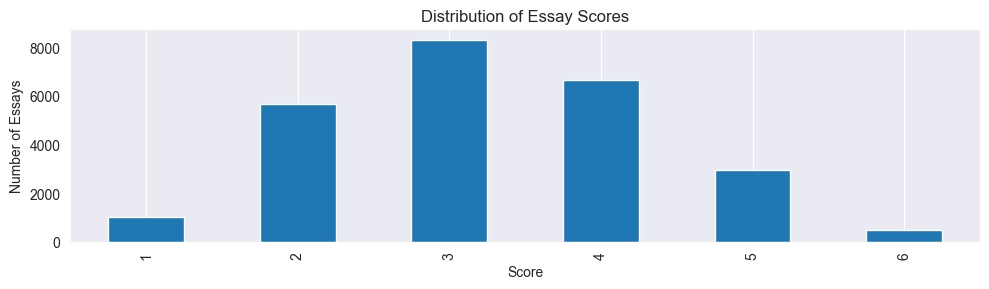

In [91]:
import matplotlib.pyplot as plt

df["holistic_essay_score"].value_counts().sort_index().plot(kind='bar', figsize=(10, 3))
plt.title("Distribution of Essay Scores")
plt.xlabel("Score")
plt.ylabel("Number of Essays")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("plots/persuade_score_dist.pdf", format="pdf", bbox_inches="tight")

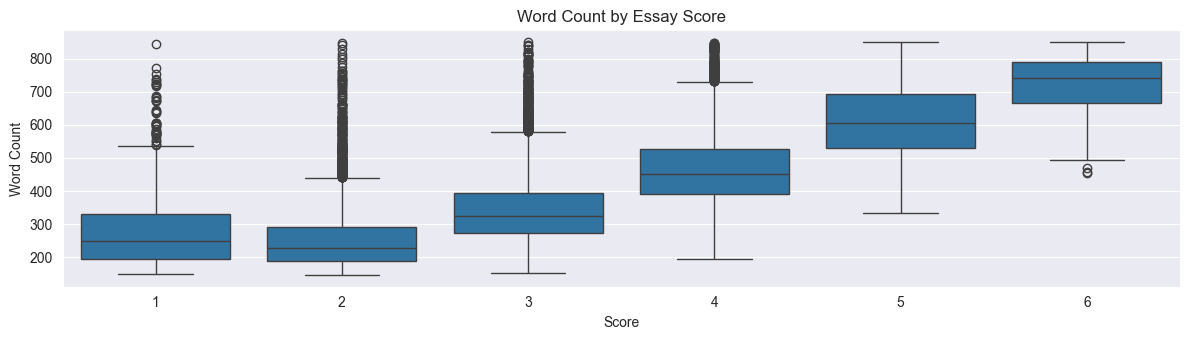

In [92]:
import seaborn as sns

plt.figure(figsize=(12, 3.5))
sns.boxplot(data=df, x="holistic_essay_score", y="word_count")
plt.title("Word Count by Essay Score")
plt.xlabel("Score")
plt.ylabel("Word Count")
plt.tight_layout()
plt.savefig("plots/persuade_word_count.pdf", format="pdf", bbox_inches="tight")

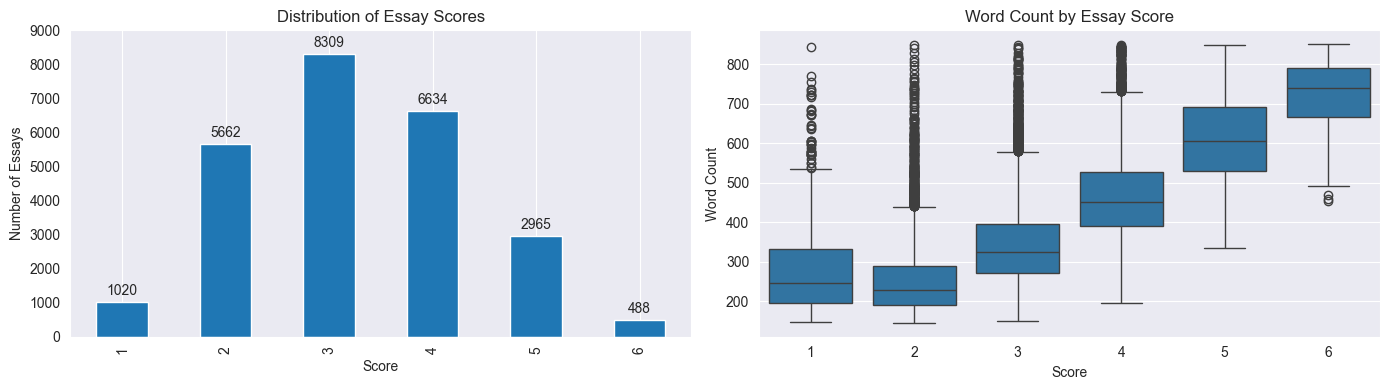

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

# mix the two plots, dist of essay scores and word count by essay score
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
counts = df["holistic_essay_score"].value_counts().sort_index()

ax0 = axes[0]
counts.plot(kind='bar', ax=ax0)
ax0.set_title("Distribution of Essay Scores")
ax0.set_xlabel("Score")
ax0.set_ylabel("Number of Essays")
ax0.grid(axis="y")
ax0.set_ylim(0, 9000)

for bar in ax0.patches:
    height = bar.get_height()
    ax0.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

sns.boxplot(
    data=df,
    x="holistic_essay_score",
    y="word_count",
    ax=axes[1]
)
axes[1].set_title("Word Count by Essay Score")
axes[1].set_xlabel("Score")
axes[1].set_ylabel("Word Count")

plt.tight_layout()
fig.savefig(
    "plots/persuade_combined.pdf",
    format="pdf",
    bbox_inches="tight"
)

### Tagged Dataset Analysis

In [94]:
stance_labels = {0: "PRO", 1: "CON", 2: "NEUTRAL"}
sentiment_labels = {0: "POSITIVE", 1: "NEGATIVE"}
formality_labels = {0: "FORMAL", 1: "INFORMAL"}

# load tagged dataset
df_tagged = pd.read_csv("persuade/tagged_persuade.csv")
print("Tagged shape:", df_tagged.shape)
df_tagged.head()

Tagged shape: (25078, 8)


,essay_id_comp,full_text,holistic_essay_score,word_count,prompt_name,stance,formality,sentiment
0,423A1CA112E2,phones\n\nmodern humans today are always on th...,3,378,Phones and driving,2.0,0,0.0
1,BC75783F96E3,this essay will explain if drivers should or s...,4,432,Phones and driving,1.0,0,0.0
2,74C8BC7417DE,driving while the use of cellular devices\n\nt...,2,179,Phones and driving,1.0,0,1.0
3,A8445CABFECE,phones & driving\n\ndrivers should not be able...,3,221,Phones and driving,1.0,1,1.0
4,6B4F7A0165B9,cell phone operation while driving\n\nthe abil...,4,334,Phones and driving,1.0,0,1.0


In [95]:
# count nulls (classification errors)
null_counts = df_tagged[["stance", "sentiment", "formality"]].isnull().sum()
total_rows = len(df)
null_percentages = (null_counts / total_rows * 100).round(2)
null_report = pd.DataFrame({
    "null count": null_counts,
    "percent (%)": null_percentages
})

null_report

,null count,percent (%)
stance,265,1.06
sentiment,342,1.36
formality,0,0.00


In [96]:
# drop null values
stance_df = df_tagged[df_tagged["stance"].notnull()]
sentiment_df = df_tagged[df_tagged["sentiment"].notnull()]
formality_df = df_tagged[df_tagged["formality"].notnull()]

In [97]:
stance_df["stance"].map(stance_labels).value_counts().reindex(["PRO", "CON", "NEUTRAL"])

stance
PRO        16071
CON         7518
NEUTRAL     1224
Name: count, dtype: int64

In [98]:
sentiment_df["sentiment"].map(sentiment_labels).value_counts().reindex(["POSITIVE", "NEGATIVE"])

sentiment
POSITIVE    17903
NEGATIVE     6833
Name: count, dtype: int64

In [99]:
formality_df["formality"].map(formality_labels).value_counts().reindex(["FORMAL", "INFORMAL"])

formality
FORMAL      20245
INFORMAL     4833
Name: count, dtype: int64

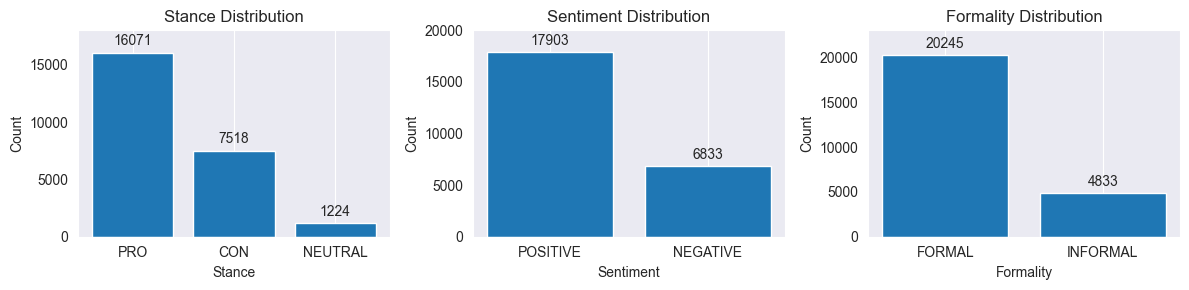

In [296]:
import matplotlib.pyplot as plt

# fig and axes
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# 1) stance
stance_counts = stance_df["stance"].value_counts().sort_index()
ax0 = axes[0]
bars0 = ax0.bar(stance_counts.index, stance_counts.values)
ax0.set_title("Stance Distribution")
ax0.set_xticks([0, 1, 2])
ax0.set_xticklabels(["PRO", "CON", "NEUTRAL"])
ax0.set_xlabel("Stance")
ax0.set_ylabel("Count")
ax0.grid(axis="y")
ax0.set_ylim(0, 18000)
# annotate
for bar in bars0:
    height = bar.get_height()
    ax0.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

# 2) sentiment
sentiment_counts = sentiment_df["sentiment"].value_counts().sort_index()
ax1 = axes[1]
bars1 = ax1.bar(sentiment_counts.index, sentiment_counts.values)
ax1.set_title("Sentiment Distribution")
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["POSITIVE", "NEGATIVE"])
ax1.set_xlabel("Sentiment")
ax1.set_ylabel("Count")
ax1.grid(axis="y")
ax1.set_ylim(0, 20000)
# annotate
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

# 3) formality
formality_counts = formality_df["formality"].value_counts().sort_index()
ax2 = axes[2]
bars2 = ax2.bar(formality_counts.index, formality_counts.values)
ax2.set_title("Formality Distribution")
ax2.set_xticks([0, 1])
ax2.set_xticklabels(["FORMAL", "INFORMAL"])
ax2.set_xlabel("Formality")
ax2.set_ylabel("Count")
ax2.grid(axis="y")
ax2.set_ylim(0, 23000)
# annotate
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.savefig("plots/tagged_attribute_dist.pdf", format="pdf", bbox_inches="tight")

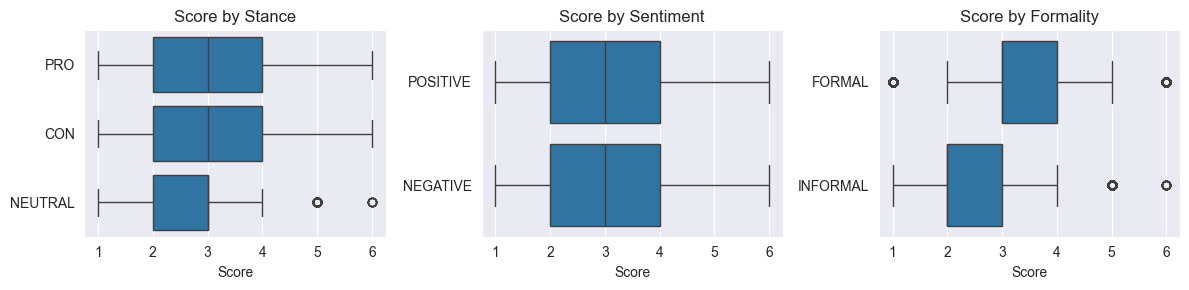

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharex=False)

# stance
sns.boxplot(
    y='stance',
    x='holistic_essay_score',
    data=df_tagged,
    ax=axes[0],
    orient='h',
)
axes[0].set_yticks([0, 1, 2])
axes[0].set_yticklabels(['PRO', 'CON', 'NEUTRAL'])
axes[0].set_title("Score by Stance")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("")

# sentiment
sns.boxplot(
    y='sentiment',
    x='holistic_essay_score',
    data=df_tagged,
    ax=axes[1],
    orient='h',
)
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['POSITIVE', 'NEGATIVE'])
axes[1].set_title("Score by Sentiment")
axes[1].set_xlabel("Score")
axes[1].set_ylabel("")

# formality
sns.boxplot(
    y='formality',
    x='holistic_essay_score',
    data=df_tagged,
    ax=axes[2],
    orient='h',
)
axes[2].set_yticks([0, 1])
axes[2].set_yticklabels(['FORMAL', 'INFORMAL'])
axes[2].set_title("Score by Formality")
axes[2].set_xlabel("Score")
axes[2].set_ylabel("")

plt.tight_layout()
plt.savefig("plots/tagged_attribute_box_plots.pdf", format="pdf", bbox_inches="tight")

#### Ordered Regression Model to predict scores:

y = predicted score, x = combination of features (attributes of stance, sentiment and formality)

In [102]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# prepare data
df = df_tagged.dropna(subset=["stance", "sentiment", "formality", "holistic_essay_score"])
df.loc[:, "stance"] = df["stance"].astype(int)
df.loc[:, "sentiment"] = df["sentiment"].astype(int)
df.loc[:, "formality"] = df["formality"].astype(int)
df.loc[:, "holistic_essay_score"] = df["holistic_essay_score"].astype(int)

# fit regression model
model = OrderedModel(
    df["holistic_essay_score"],
    pd.get_dummies(df[["stance", "sentiment", "formality"]], drop_first=True),
    distr="logit"
)
res = model.fit(method='bfgs')
res.summary()

Optimization terminated successfully.
         Current function value: 1.459950
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OrderedModel Results                              
================================================================================
Dep. Variable:     holistic_essay_score   Log-Likelihood:                -35735.
Model:                     OrderedModel   AIC:                         7.149e+04
Method:              Maximum Likelihood   BIC:                         7.155e+04
Date:                  Tue, 22 Jul 2025                                         
Time:                          16:03:46                                         
No. Observations:                 24477                                         
Df Residuals:                     24469                                         
Df Model:                             3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
stance        -0.2417      0.022    -10.842      0.000      -0.285      -0.198
sentiment      0.2188      0.029      7.611      0.000       0.162       0.275
formality     -1.5191      0.031    -48.701      0.000      -1.580      -1.458
1/2           -3.7093      0.036   -101.943      0.000      -3.781      -3.638
2/3            0.8302      0.014     59.432      0.000       0.803       0.858
3/4            0.4248      0.010     42.470      0.000       0.405       0.444
4/5            0.4028      0.011     35.161      0.000       0.380       0.425
5/6            0.7412      0.021     36.088      0.000       0.701       0.782
==============================================================================
"""

In [239]:
import itertools
import pandas as pd
from scipy.special import expit

# regression coefficients
beta = {
    'stance':   -0.2417,
    'sentiment': 0.2188,
    'formality':-1.5191
}

# five taus from fitted model
tau = [
    -3.7093,  # tau1 (1/2)
     0.8302,  # tau2 (2/3)
     0.4248,  # tau3 (3/4)
     0.4028,  # tau4 (4/5)
     0.7412   # tau5 (5/6)
]

rows = []
for sentiment, formality, stance in itertools.product([0,1], [0,1], [0,1,2]):
    # get linear predictor
    eta = (sentiment*beta['sentiment'] + formality*beta['formality'] + stance*beta['stance'])
    # cumulative probs
    cdf = [expit(t - eta) for t in tau]
    cdf = [0.0] + cdf + [1.0]  # pad

    # category probs
    probs = [cdf[j] - cdf[j-1] for j in range(1,7)]

    # expected score
    exp_score = sum(j * p for j,p in enumerate(probs, start=1))

    rows.append({
        'sentiment': 'NEGATIVE' if sentiment else 'POSITIVE',
        'formality': 'INFORMAL' if formality else 'FORMAL',
        'stance':    ['PRO','CON','NEUTRAL'][stance],
        'linear_score_advantage': eta,
        'expected_score':  round(exp_score, 3)
    })

df = pd.DataFrame(rows)
df

,sentiment,formality,stance,linear_score_advantage,expected_score
0,POSITIVE,FORMAL,PRO,0.0000,3.398
1,POSITIVE,FORMAL,CON,-0.2417,3.181
2,POSITIVE,FORMAL,NEUTRAL,-0.4834,2.980
3,POSITIVE,INFORMAL,PRO,-1.5191,2.334
4,POSITIVE,INFORMAL,CON,-1.7608,2.225
5,POSITIVE,INFORMAL,NEUTRAL,-2.0025,2.126
6,NEGATIVE,FORMAL,PRO,0.2188,3.608
7,NEGATIVE,FORMAL,CON,-0.0229,3.377
8,NEGATIVE,FORMAL,NEUTRAL,-0.2646,3.161
9,NEGATIVE,INFORMAL,PRO,-1.3003,2.444


### Scored Dataset

In [220]:
import os
import pandas as pd

# strings for file loading
base_folder = "counterfactuals_scored/persuade"
models = ["gemma3", "llama3", "qwen3", "deepseek", "gemma3_ft"]
filenames = [
    "formality_formal_to_informal_scored.csv",
    "formality_informal_to_formal_scored.csv",
    "sentiment_negative_to_positive_scored.csv",
    "sentiment_positive_to_negative_scored.csv",
    "stance_con_to_pro_scored.csv",
    "stance_pro_to_con_scored.csv"
]

all_data = []
for model in models:
    for fname in filenames:
        fpath = os.path.join(base_folder, model, fname)
        if os.path.exists(fpath):
            df = pd.read_csv(fpath)
            df['model'] = model
            df['direction'] = fname.replace("_scored.csv", "")
            all_data.append(df)
        else:
            print(f"Missing file: {fpath}")

# combine all into a single dataframe
df_all = pd.concat(all_data, ignore_index=True)

# separate essay_code into two attributes
df_all['version'] = df_all['essay_code'].apply(lambda x: 'OR' if x.endswith('-O') else 'CF')
df_all['essay_id'] = df_all['essay_code'].str.extract(r'(\d+)-')[0].astype(int)

# sort and show
df_all.sort_values(by=['model', 'direction', 'essay_id', 'version'], inplace=True)
df_all = df_all.dropna(subset=["score_llm"]).reset_index(drop=True)
df_all

,essay_code,full_text,attribute,label,score_og,score_llm,model,direction,version,essay_id
0,354-CFO,"cell phone use while driving is, like, a reall...",formality,1,4,6.0,deepseek,formality_formal_to_informal,CF,354
1,354-O,cell phone use while driving is one of those h...,formality,0,4,6.0,deepseek,formality_formal_to_informal,OR,354
2,440-CFO,phones and driving\n\neveryday people die in c...,formality,1,3,6.0,deepseek,formality_formal_to_informal,CF,440
3,440-O,phones and driving\n\neveryday people die in c...,formality,0,3,6.0,deepseek,formality_formal_to_informal,OR,440
4,467-CFO,cell phones? pretty much everyone’s got one th...,formality,1,4,6.0,deepseek,formality_formal_to_informal,CF,467
...,...,...,...,...,...,...,...,...,...,...
5972,24015-O,is it better fro you to ask for more advice or...,stance,0,3,5.0,qwen3,stance_pro_to_con,OR,24015
5973,24395-CST,"in 2002, a study showed that only 23% of ameri...",stance,1,5,5.0,qwen3,stance_pro_to_con,CF,24395
5974,24395-O,"in 2002, a study showed that only 23% of ameri...",stance,0,5,5.0,qwen3,stance_pro_to_con,OR,24395
5975,24743-CST,"have you ever been stuck, not knowing what cho...",stance,1,6,5.0,qwen3,stance_pro_to_con,CF,24743


In [221]:
# count the number of originals and counterfactuals per model
cf_counts = df_all.groupby(['model', 'version']).size().unstack(fill_value=0)
cf_counts

version,CF,OR
model,,
deepseek,588,589
gemma3,600,600
gemma3_ft,600,600
llama3,600,600
qwen3,600,600


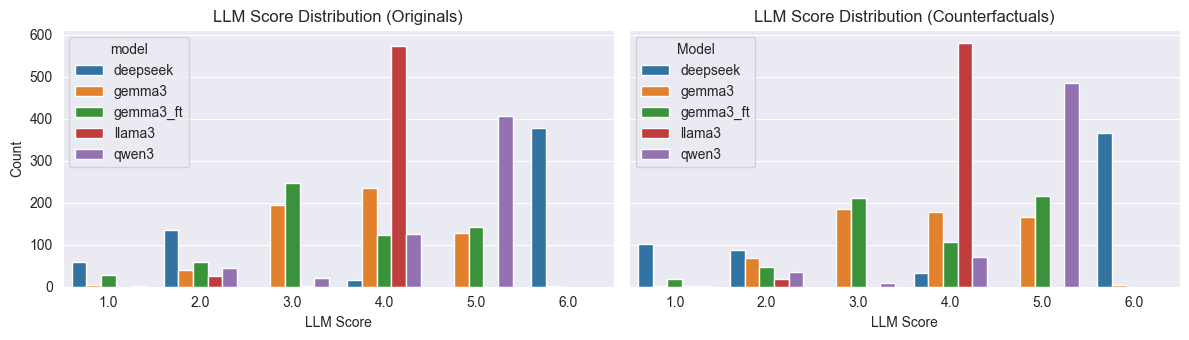

In [240]:
# cast score_llm to number
df_all["score_llm"] = pd.to_numeric(df_all["score_llm"], errors='coerce')

# get cfs and originals
df_orig = df_all[df_all["version"].str.contains("OR")]
df_cf = df_all[df_all["version"].str.contains("CF")]

# handle order and colors
score_order = sorted(df_all["score_llm"].dropna().unique())
model_list = sorted(df_all["model"].dropna().unique())  # Ensures consistent model ordering
model_palette = sns.color_palette("tab10", len(model_list))
model_colors = dict(zip(model_list, model_palette))

# subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 3.5), sharey=True)

# original plot
sns.countplot(
    data=df_orig, x="score_llm", hue="model",
    order=score_order, hue_order=model_list,
    ax=axes[0], palette=model_colors
)
axes[0].set_title("LLM Score Distribution (Originals)")
axes[0].set_xlabel("LLM Score")
axes[0].set_ylabel("Count")

# cf plot
sns.countplot(
    data=df_cf, x="score_llm", hue="model",
    order=score_order, hue_order=model_list,
    ax=axes[1], palette=model_colors
)
axes[1].set_title("LLM Score Distribution (Counterfactuals)")
axes[1].set_xlabel("LLM Score")
axes[1].set_ylabel("Count")
axes[1].legend(title="Model")

plt.tight_layout()
plt.savefig("plots/llm_score_dist.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 0.98, 'Original vs Counterfactual LLM Score Distribution by direction and model')

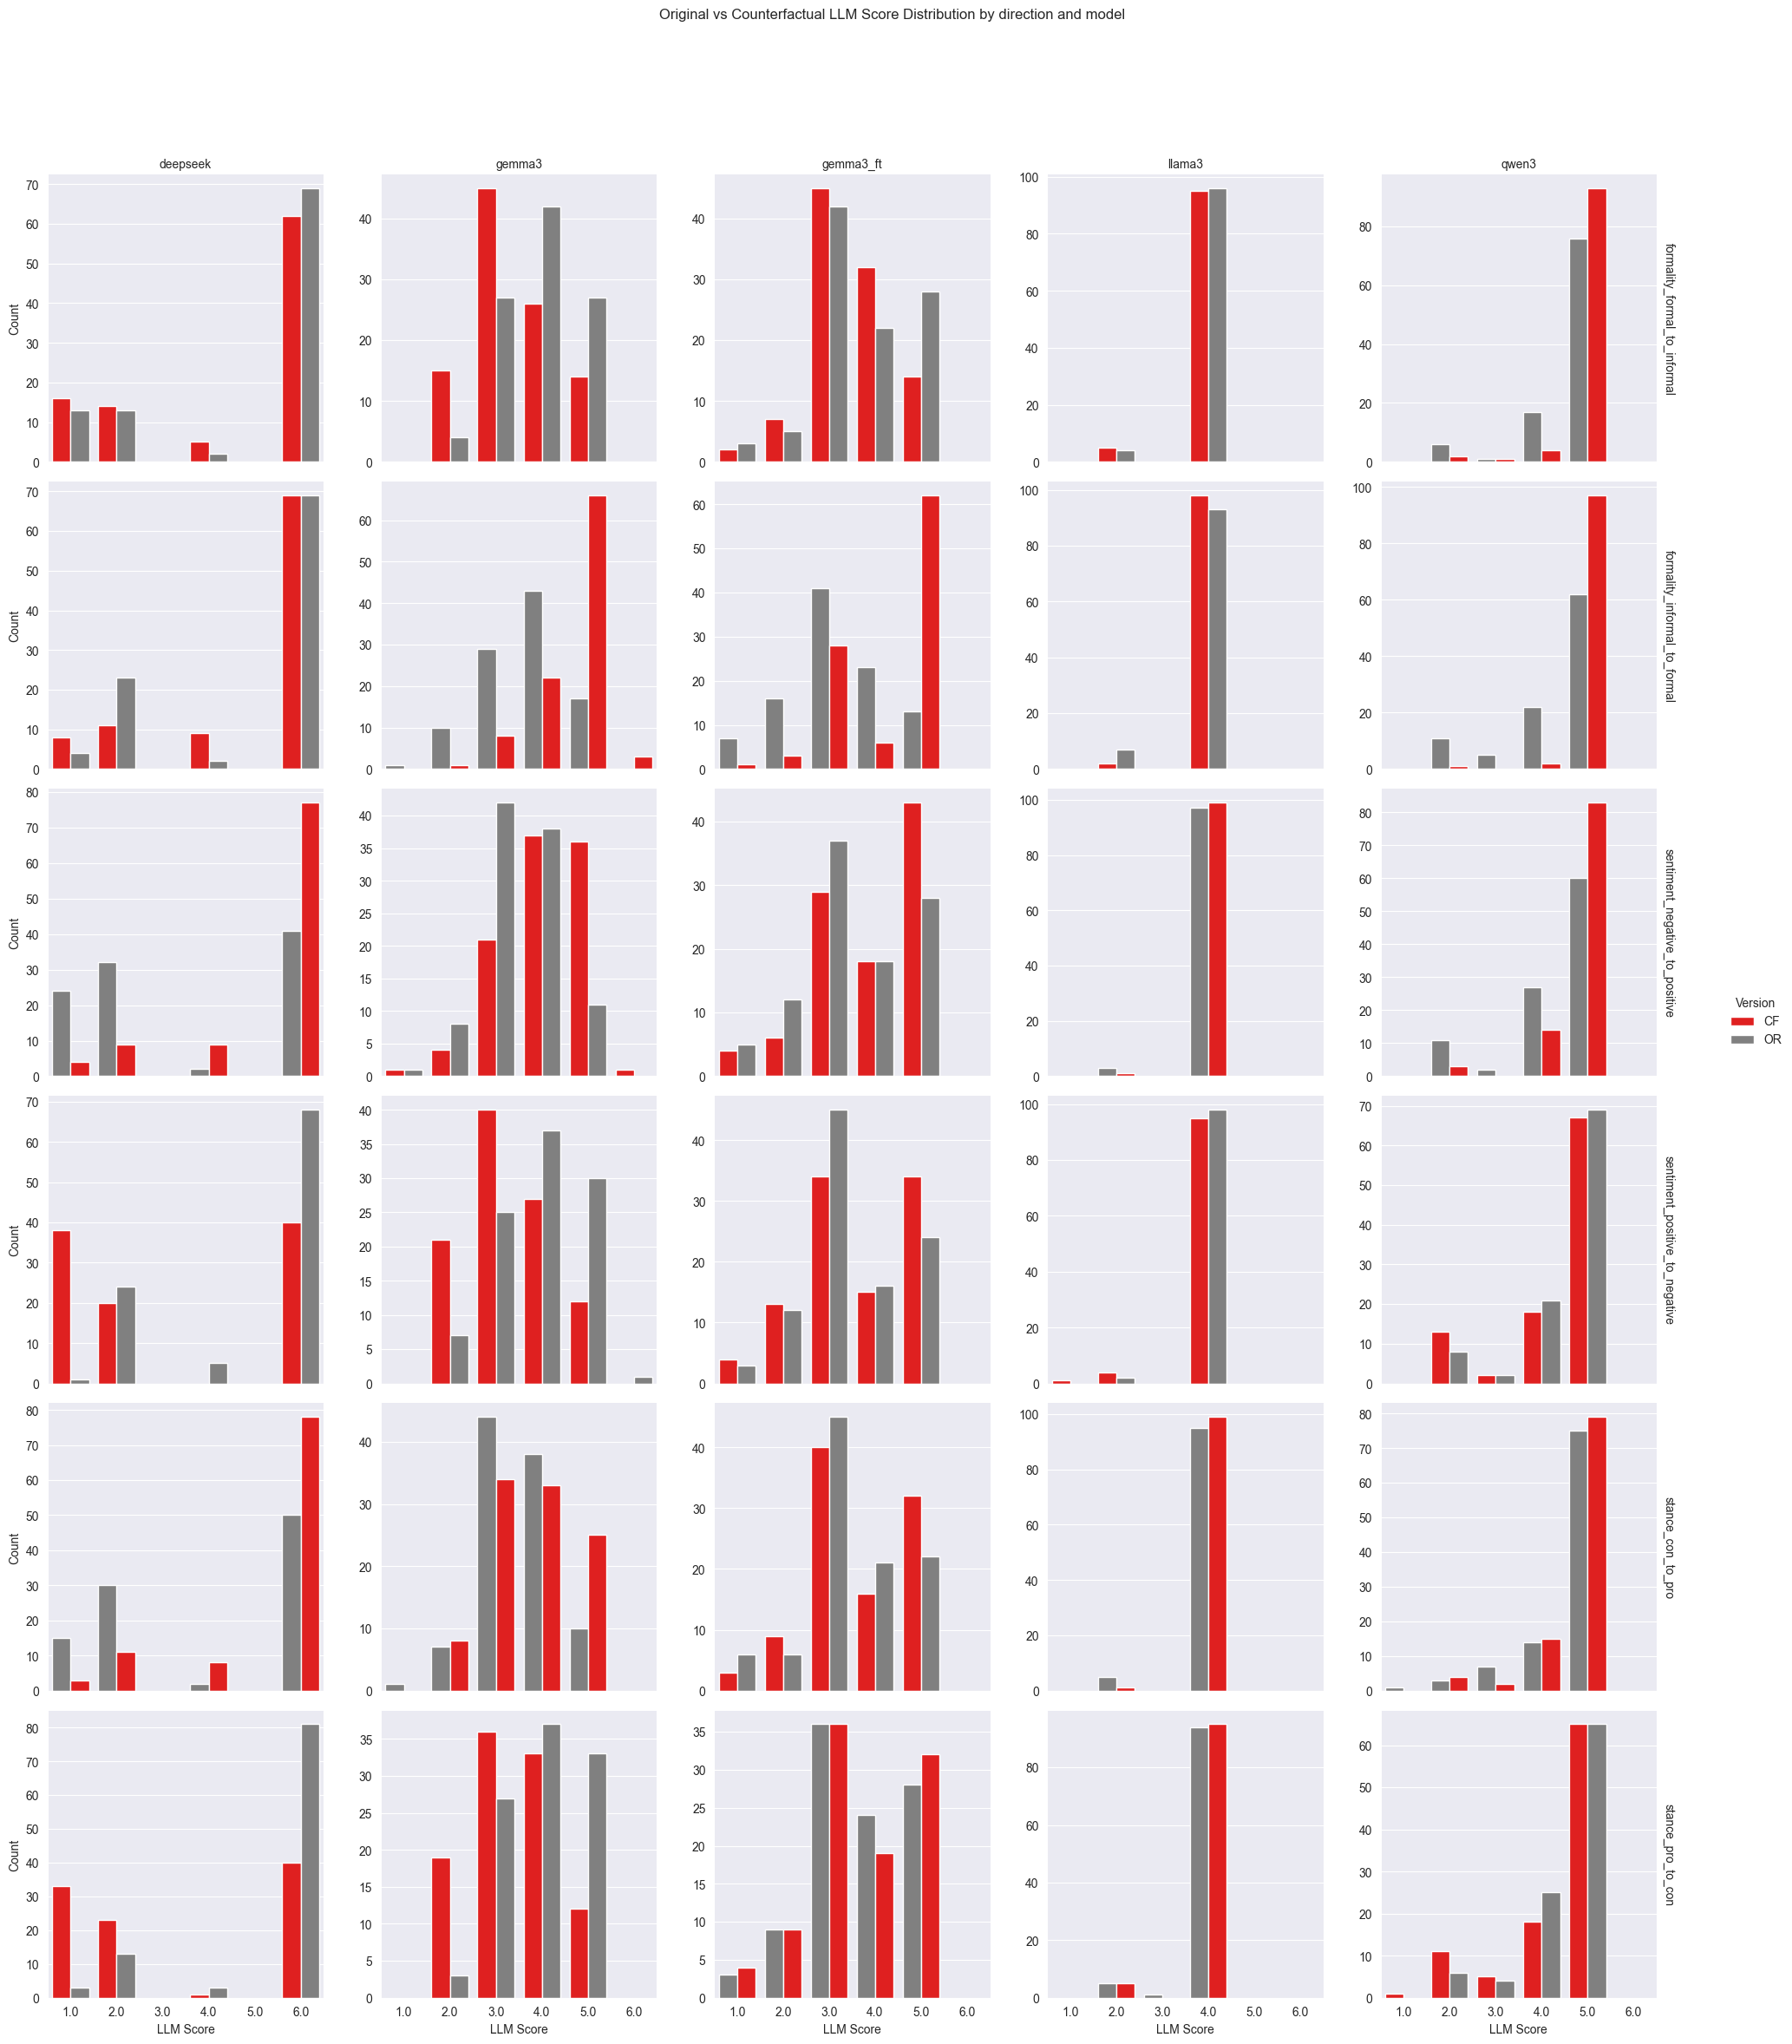

In [205]:
# filter df
df_subset = df_all[df_all['version'].isin(['OR', 'CF'])].copy()

# handle order
score_order = sorted(df_subset['score_llm'].unique())

# plots
g = sns.FacetGrid(
    df_subset,
    row="direction",
    col="model",
    height=4,
    margin_titles=True,
    sharey=False
)
g.map_dataframe(
    sns.countplot,
    x="score_llm",
    hue="version",
    palette={"OR": "gray", "CF": "red"},
    order=score_order
)

# plot details
g.set_axis_labels("LLM Score", "Count")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.add_legend(title="Version")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Original vs Counterfactual LLM Score Distribution by direction and model")

In [206]:
# get metrics
summary_metrics = (
    df_all[df_all["version"].isin(["OR", "CF"])]
    .groupby(["model", "direction", "version"])["score_llm"]
    .agg(["count", "mean", "std", "median", "min", "max"])
    .reset_index()
    .sort_values(by=["model", "direction", "version"])
)

summary_metrics

,model,direction,version,count,mean,std,median,min,max
0,deepseek,formality_formal_to_informal,CF,97,4.494845,2.102200,6.0,1.0,6.0
1,deepseek,formality_formal_to_informal,OR,97,4.752577,2.015724,6.0,1.0,6.0
2,deepseek,formality_informal_to_formal,CF,97,4.948454,1.781684,6.0,1.0,6.0
3,deepseek,formality_informal_to_formal,OR,98,4.816327,1.868606,6.0,1.0,6.0
4,deepseek,sentiment_negative_to_positive,CF,99,5.252525,1.514174,6.0,1.0,6.0
5,deepseek,sentiment_negative_to_positive,OR,99,3.454545,2.209778,2.0,1.0,6.0
6,deepseek,sentiment_positive_to_negative,CF,98,3.244898,2.328936,2.0,1.0,6.0
7,deepseek,sentiment_positive_to_negative,OR,98,4.867347,1.768206,6.0,1.0,6.0
8,deepseek,stance_con_to_pro,CF,100,5.250000,1.513408,6.0,1.0,6.0
9,deepseek,stance_con_to_pro,OR,97,3.948454,2.176442,6.0,1.0,6.0


In [207]:
mean_diff_df = (
    df_all[df_all["version"].isin(["OR", "CF"])]
    .groupby(["model", "direction", "version"])["score_llm"]
    .mean()
    .unstack("version")
    .reset_index()
)

# difference: CF - OR (positive = score went up after cf)
mean_diff_df["diff"] = mean_diff_df["CF"] - mean_diff_df["OR"]
mean_diff_df["change"] = mean_diff_df["diff"].apply(
    lambda x: "increase" if x > 0 else "decrease" if x < 0 else "no change"
)

mean_diff_df

version,model,direction,CF,OR,diff,change
0,deepseek,formality_formal_to_informal,4.494845,4.752577,-0.257732,decrease
1,deepseek,formality_informal_to_formal,4.948454,4.816327,0.132127,increase
2,deepseek,sentiment_negative_to_positive,5.252525,3.454545,1.797980,increase
3,deepseek,sentiment_positive_to_negative,3.244898,4.867347,-1.622449,decrease
4,deepseek,stance_con_to_pro,5.250000,3.948454,1.301546,increase
5,deepseek,stance_pro_to_con,3.329897,5.270000,-1.940103,decrease
6,gemma3,formality_formal_to_informal,3.390000,3.920000,-0.530000,decrease
7,gemma3,formality_informal_to_formal,4.620000,3.650000,0.970000,increase
8,gemma3,sentiment_negative_to_positive,4.060000,3.500000,0.560000,increase
9,gemma3,sentiment_positive_to_negative,3.300000,3.930000,-0.630000,decrease


In [208]:
# average difference between ogs and counterfactuals

avg_diff = (
    mean_diff_df
    .groupby("direction")["diff"]
    .mean()
    .reset_index()
    .rename(columns={"diff":"avg_diff_all_models"})
)

change_counts = (
    mean_diff_df
    .groupby(["direction","change"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

direction_summary = avg_diff.merge(change_counts, on="direction")

direction_summary

,direction,avg_diff_all_models,decrease,increase
0,formality_formal_to_informal,-0.147546,4,1
1,formality_informal_to_formal,0.572425,0,5
2,sentiment_negative_to_positive,0.637596,0,5
3,sentiment_positive_to_negative,-0.456490,4,1
4,stance_con_to_pro,0.384309,0,5
5,stance_pro_to_con,-0.536021,3,2


In [237]:
# including avg cf score and avg originals score on columns

avg_scores = (
    mean_diff_df
    .groupby("direction")[["CF","OR"]]
    .mean()
    .reset_index()
    .rename(columns={
        "CF": "avg_cf_score",
        "OR": "avg_or_score"
    })
)

direction_summary = (
    avg_diff
    .round(4)
    .merge(change_counts, on="direction")
    .merge(avg_scores,   on="direction")
)

direction_summary

,direction,avg_diff_all_models,decrease,increase,avg_cf_score,avg_or_score
0,formality_formal_to_informal,-0.1475,4,1,4.030969,4.178515
1,formality_informal_to_formal,0.5724,0,5,4.545691,3.973265
2,sentiment_negative_to_positive,0.6376,0,5,4.392505,3.754909
3,sentiment_positive_to_negative,-0.4565,4,1,3.688980,4.145469
4,stance_con_to_pro,0.3843,0,5,4.264000,3.879691
5,stance_pro_to_con,-0.5360,3,2,3.723979,4.260000


In [210]:
# load tagged dataset
df = pd.read_csv("persuade/tagged_persuade.csv").dropna(subset=["stance", "sentiment", "formality", "holistic_essay_score"])

# make sure numeric
df["stance"] = df["stance"].astype(int)
df["sentiment"] = df["sentiment"].astype(int)
df["formality"] = df["formality"].astype(int)

# mean by group
human_means = {
    "stance": df.groupby("stance") ["holistic_essay_score"].mean(),
    "sentiment": df.groupby("sentiment") ["holistic_essay_score"].mean(),
    "formality": df.groupby("formality") ["holistic_essay_score"].mean(),
}

# get human gaps
human_gaps = {
    "stance_PRO_vs_CON": human_means["stance"][0] - human_means["stance"][1],
    "sent_POS_vs_NEG": human_means["sentiment"][0] - human_means["sentiment"][1],
    "formal_vs_informal": human_means["formality"][0] - human_means["formality"][1],
}

for k,v in human_gaps.items():
    print(f"{k:24s} {v:+0.2f}")

stance_PRO_vs_CON        +0.02
sent_POS_vs_NEG          -0.01
formal_vs_informal       +0.87


### Metrics (Bias and performance)

In [238]:
import glob
import os
import pandas as pd
from sklearn.metrics import cohen_kappa_score, accuracy_score, f1_score

# computes qwk, accuracy, and F1 from df depending on mode (original, cf, or both)
def compute_metrics(df, mode):
    # drop any rows missing either label
    df = df.dropna(subset=["score_og", "score_llm"])
    # select subset
    if mode == "OR":
        sel = df[df["essay_code"].str.endswith("-O")]
    elif mode == "CF":
        sel = df[df["essay_code"].str.contains("-C")]
    else:
        sel = df

    y_true = sel["score_og"]
    y_pred = sel["score_llm"]

    return {
        "qwk":   cohen_kappa_score(y_true, y_pred, weights="quadratic"),
        "acc":   accuracy_score(y_true, y_pred),
        "f1":    f1_score(y_true, y_pred, average="weighted")
    }


# load data in dfs
BASE = "counterfactuals_scored/persuade"

models = {}
for model_name in os.listdir(BASE):
    model_dir = os.path.join(BASE, model_name)
    if not os.path.isdir(model_dir):
        continue

    paths = glob.glob(os.path.join(model_dir, "*_scored.csv"))
    if not paths:
        print(f"no files for {model_name}, skipping")
        continue

    dfs = [pd.read_csv(p) for p in paths]
    models[model_name] = pd.concat(dfs, ignore_index=True)


# get per‐model QWK, accuracy, F1
for name, df in models.items():
    m_or  = compute_metrics(df, "OR")
    m_cf  = compute_metrics(df, "CF")
    m_both = compute_metrics(df, "both")

    print(f"\n=== Metrics for {name} ===")
    print(f" ORIGINALS:")
    print(f"   QWK:  {m_or['qwk']:.3f}")
    print(f"   ACC:  {m_or['acc']:.3f}")
    print(f"   F1:   {m_or['f1']:.3f}")
    print(f" COUNTERFACTUALS:")
    print(f"   QWK:  {m_cf['qwk']:.3f}")
    print(f"   ACC:  {m_cf['acc']:.3f}")
    print(f"   F1:   {m_cf['f1']:.3f}")
    print(f" DIFF (orig − cf):")
    print(f"   ΔQWK: {m_or['qwk'] - m_cf['qwk']:.3f}")
    print(f"   ΔACC: {m_or['acc'] - m_cf['acc']:.3f}")
    print(f"   ΔF1:  {m_or['f1']  - m_cf['f1']:.3f}")
    print(f" COMBINED:")
    print(f"   QWK:  {m_both['qwk']:.3f}")
    print(f"   ACC:  {m_both['acc']:.3f}")
    print(f"   F1:   {m_both['f1']:.3f}")


=== Metrics for llama3 ===
 ORIGINALS:
   QWK:  0.078
   ACC:  0.285
   F1:   0.150
 COUNTERFACTUALS:
   QWK:  0.043
   ACC:  0.280
   F1:   0.144
 DIFF (orig − cf):
   ΔQWK: 0.035
   ΔACC: 0.005
   ΔF1:  0.006
 COMBINED:
   QWK:  0.060
   ACC:  0.282
   F1:   0.147

=== Metrics for gemma3 ===
 ORIGINALS:
   QWK:  0.456
   ACC:  0.372
   F1:   0.357
 COUNTERFACTUALS:
   QWK:  0.301
   ACC:  0.313
   F1:   0.314
 DIFF (orig − cf):
   ΔQWK: 0.155
   ΔACC: 0.058
   ΔF1:  0.043
 COMBINED:
   QWK:  0.375
   ACC:  0.343
   F1:   0.336

=== Metrics for qwen3 ===
 ORIGINALS:
   QWK:  0.218
   ACC:  0.215
   F1:   0.179
 COUNTERFACTUALS:
   QWK:  0.115
   ACC:  0.193
   F1:   0.153
 DIFF (orig − cf):
   ΔQWK: 0.103
   ΔACC: 0.022
   ΔF1:  0.026
 COMBINED:
   QWK:  0.164
   ACC:  0.204
   F1:   0.167

=== Metrics for deepseek ===
 ORIGINALS:
   QWK:  0.154
   ACC:  0.122
   F1:   0.114
 COUNTERFACTUALS:
   QWK:  0.127
   ACC:  0.100
   F1:   0.106
 DIFF (orig − cf):
   ΔQWK: 0.027
   ΔACC: 0.02

In [258]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# calculates osd csd via regression models (to get r2 coefficients)
# score_og : human score H
# score_llm: AES score S
# label : 0 or 1 (the flip indicator)
# osd_r2 : R2 coeff from regressing |S−H| ~ label
# csd_delta_r2 : (R2 from |S−H| ~ H + label) minus (R2 from |S−H| ~ H)
def compute_osd_csd_regression(df):
    # 1) drop nulls & cast
    df = df.dropna(subset=['score_og','score_llm','label']).copy()
    df['label'] = df['label'].astype(int)

    # 2) absolute error
    df['abs_error'] = np.abs(df['score_llm'] - df['score_og'])

    X_label = df[['label']].values
    X_H = df[['score_og']].values
    X_both = df[['score_og','label']].values
    y = df['abs_error'].values

    # 3) fit OSD model: abs_error ~ label
    lm_osd = LinearRegression().fit(X_label, y)
    y_pred_osd = lm_osd.predict(X_label)
    osd_r2 = r2_score(y, y_pred_osd)

    # 4) fit two models for CSD:
    # (a) abs_error ~ H
    lm_csd_1 = LinearRegression().fit(X_H, y)
    y1 = lm_csd_1.predict(X_H)
    r2_1 = r2_score(y, y1)

    # (b) abs_error ~ H + label
    lm_csd_2 = LinearRegression().fit(X_both, y)
    y2 = lm_csd_2.predict(X_both)
    r2_2 = r2_score(y, y2)

    csd_delta_r2 = r2_2 - r2_1

    return osd_r2, csd_delta_r2

In [259]:
import glob, os

BASE = "counterfactuals_scored/persuade"
results = []

# loop to get a summary of osd r2 and csd r2 in one table for each flip for each model
for model_name in os.listdir(BASE):
    model_dir = os.path.join(BASE, model_name)
    if not os.path.isdir(model_dir):
        continue

    for csv_path in glob.glob(os.path.join(model_dir, "*.csv")):
        df = pd.read_csv(csv_path)
        osd_r2, csd_delta_r2 = compute_osd_csd_regression(df)

        results.append({
            "model": model_name,
            "flip_file": os.path.basename(csv_path),
            "OSD_R2": osd_r2,
            "CSD_delta_R2": csd_delta_r2
        })

df_results = pd.DataFrame(results)
df_results

,model,flip_file,OSD_R2,CSD_delta_R2
0,llama3,sentiment_positive_to_negative_scored.csv,0.000036,0.000036
1,llama3,stance_con_to_pro_scored.csv,0.001408,0.001408
2,llama3,formality_formal_to_informal_scored.csv,0.000606,0.000606
3,llama3,sentiment_negative_to_positive_scored.csv,0.000606,0.000606
4,llama3,stance_pro_to_con_scored.csv,0.000350,0.000350
5,llama3,formality_informal_to_formal_scored.csv,0.000142,0.000142
6,gemma3,sentiment_positive_to_negative_scored.csv,0.000351,0.000351
7,gemma3,stance_con_to_pro_scored.csv,0.041544,0.041544
8,gemma3,formality_formal_to_informal_scored.csv,0.005881,0.005881
9,gemma3,sentiment_negative_to_positive_scored.csv,0.043954,0.043954


In [260]:
# average osd and csd r2s per flip
avg_by_flip = (
    df_results
    .groupby('flip_file')[['OSD_R2', 'CSD_delta_R2']]
    .mean()
    .reset_index()
    .rename(columns={'OSD_R2': 'AVG_OSD_R2', 'CSD_delta_R2': 'AVG_CSD_delta_R2'})
)

avg_by_flip = (
    avg_by_flip
    .sort_values('AVG_CSD_delta_R2', ascending=False)
    .reset_index(drop=True)
    .round(4)
)

avg_by_flip

,flip_file,AVG_OSD_R2,AVG_CSD_delta_R2
0,formality_informal_to_formal_scored.csv,0.0785,0.0785
1,sentiment_negative_to_positive_scored.csv,0.0312,0.0311
2,stance_con_to_pro_scored.csv,0.0160,0.0161
3,formality_formal_to_informal_scored.csv,0.0115,0.0116
4,sentiment_positive_to_negative_scored.csv,0.0081,0.0081
5,stance_pro_to_con_scored.csv,0.0050,0.0050


In [261]:
# average osd and csd r2s per model
avg_by_model = (
    df_results
    .groupby('model')[['OSD_R2', 'CSD_delta_R2']]
    .mean()
    .reset_index()
    .rename(columns={'OSD_R2': 'AVG_OSD_R2', 'CSD_delta_R2': 'AVG_CSD_delta_R2'})
)

avg_by_model = (
    avg_by_model
    .sort_values('AVG_CSD_delta_R2', ascending=False)
    .reset_index(drop=True)
    .round(4)
)

avg_by_model

,model,AVG_OSD_R2,AVG_CSD_delta_R2
0,gemma3_ft,0.0621,0.0621
1,gemma3,0.0358,0.0358
2,qwen3,0.0150,0.0150
3,deepseek,0.0119,0.0120
4,llama3,0.0005,0.0005


### JS Distance

In [117]:
import glob
import os
import pandas as pd
from scipy.spatial.distance import jensenshannon

def compute_js(df, score_col='score_llm', code_col='essay_code'):
    df = df.dropna(subset=[score_col]).copy()
    # create version column depending on whether it has -O or -CFO (else)
    df['version'] = np.where(
        df[code_col].str.endswith('-O'),
        'OR',
        'CF'
    )

    # count vectors
    bins = sorted(df[score_col].unique())
    og_counts = df[df['version']=='OR'][score_col].value_counts().reindex(bins, fill_value=0)
    cf_counts = df[df['version']=='CF'][score_col].value_counts().reindex(bins, fill_value=0)

    P = og_counts.values / og_counts.sum()
    Q = cf_counts.values / cf_counts.sum()

    dist = jensenshannon(P, Q, base=2)
    div = dist**2
    return dist, div

BASE = "counterfactuals_scored/persuade"
models = {}
for model_name in os.listdir(BASE):
    model_dir = os.path.join(BASE, model_name)
    if not os.path.isdir(model_dir):
        continue

    paths = glob.glob(os.path.join(model_dir, "*_scored.csv"))
    if not paths:
        print(f"no files for {model_name}, skipping")
        continue

    dfs = [pd.read_csv(p) for p in paths]
    df_all = pd.concat(dfs, ignore_index=True)
    models[model_name] = df_all

for name, df in models.items():
    js_dist, js_div = compute_js(df, score_col='score_llm')

    print(f"\n=== {name} ===")
    print(f"JS distance (OR vs CF):   {js_dist:.4f}")
    print(f"JS divergence (OR vs CF):  {js_div:.4f}")


=== llama3 ===
JS distance (OR vs CF):   0.0508
JS divergence (OR vs CF):  0.0026

=== gemma3 ===
JS distance (OR vs CF):   0.1195
JS divergence (OR vs CF):  0.0143

=== qwen3 ===
JS distance (OR vs CF):   0.1292
JS divergence (OR vs CF):  0.0167

=== deepseek ===
JS distance (OR vs CF):   0.1277
JS divergence (OR vs CF):  0.0163

=== gemma3_ft ===
JS distance (OR vs CF):   0.1167
JS divergence (OR vs CF):  0.0136


### QWK and JS distance per flip per model

In [242]:
import glob, os
import numpy as np
from sklearn.metrics import cohen_kappa_score
from scipy.spatial import distance

BASE = "counterfactuals_scored/persuade"

def extract_direction_from_path(path):
    fname = os.path.basename(path)
    return fname.replace("_scored.csv", "")

def load_model_dfs(base):
    models = {}
    for model in os.listdir(base):
        d = os.path.join(base, model)
        if not os.path.isdir(d): continue
        parts = []
        for csvf in glob.glob(os.path.join(d, "*_scored.csv")):
            df = pd.read_csv(csvf)
            df["direction"] = extract_direction_from_path(csvf)
            parts.append(df)
        if parts:
            models[model] = pd.concat(parts, ignore_index=True)
    return models

def qwk_for_flip(df, flip):
    sub = df[df["direction"] == flip].dropna(subset=["score_og","score_llm"])
    orig = sub[sub["essay_code"].str.endswith("-O")]
    cf   = sub[sub["essay_code"].str.contains("-C")]
    return (
        cohen_kappa_score(orig["score_og"], orig["score_llm"], weights="quadratic"),
        cohen_kappa_score(cf["score_og"],   cf["score_llm"],   weights="quadratic"),
        cohen_kappa_score(sub["score_og"],   sub["score_llm"],   weights="quadratic"),
    )

def js_for_flip(df, flip):
    sub = df[df["direction"] == flip].dropna(subset=["score_llm"])
    # build full support
    support = sorted(sub["score_llm"].astype(int).unique())
    def hist(srs):
        cnt = np.bincount(srs.astype(int), minlength=max(support)+1)[support]
        return cnt / cnt.sum()
    p_or = hist(sub[sub["essay_code"].str.endswith("-O")]["score_llm"])
    p_cf = hist(sub[sub["essay_code"].str.contains("-C")]["score_llm"])
    jsd = distance.jensenshannon(p_or, p_cf)
    return jsd, jsd**2

# load everything
models = load_model_dfs(BASE)

# analyze
for model_name, df in models.items():
    print(f"\n=== Model: {model_name} ===")
    for flip in sorted(df["direction"].unique()):
        q_or, q_cf, q_both = qwk_for_flip(df, flip)
        jsd, js2   = js_for_flip(df, flip)
        print(f"{flip:30s}  QWK(OR)={q_or:.3f}  QWK(CF)={q_cf:.3f}  QWK(both)={q_both:.3f}  Δ={q_or-q_cf:.3f}  "
              f"JSdist={jsd:.3f}  JSdiv={js2:.4f}")


=== Model: llama3 ===
formality_formal_to_informal    QWK(OR)=0.087  QWK(CF)=0.047  QWK(both)=0.067  Δ=0.040  JSdist=0.017  JSdiv=0.0003
formality_informal_to_formal    QWK(OR)=0.065  QWK(CF)=0.007  QWK(both)=0.036  Δ=0.058  JSdist=0.088  JSdiv=0.0077
sentiment_negative_to_positive  QWK(OR)=0.104  QWK(CF)=0.028  QWK(both)=0.066  Δ=0.077  JSdist=0.052  JSdiv=0.0027
sentiment_positive_to_negative  QWK(OR)=0.031  QWK(CF)=0.056  QWK(both)=0.043  Δ=-0.025  JSdist=0.073  JSdiv=0.0053
stance_con_to_pro               QWK(OR)=0.094  QWK(CF)=-0.017  QWK(both)=0.039  Δ=0.111  JSdist=0.087  JSdiv=0.0075
stance_pro_to_con               QWK(OR)=0.085  QWK(CF)=0.139  QWK(both)=0.112  Δ=-0.053  JSdist=0.059  JSdiv=0.0035

=== Model: gemma3 ===
formality_formal_to_informal    QWK(OR)=0.438  QWK(CF)=0.449  QWK(both)=0.443  Δ=-0.011  JSdist=0.220  JSdiv=0.0483
formality_informal_to_formal    QWK(OR)=0.430  QWK(CF)=0.195  QWK(both)=0.282  Δ=0.234  JSdist=0.402  JSdiv=0.1614
sentiment_negative_to_positive

#### Diagram to capture bias difference (og and cfs) per flip per model:

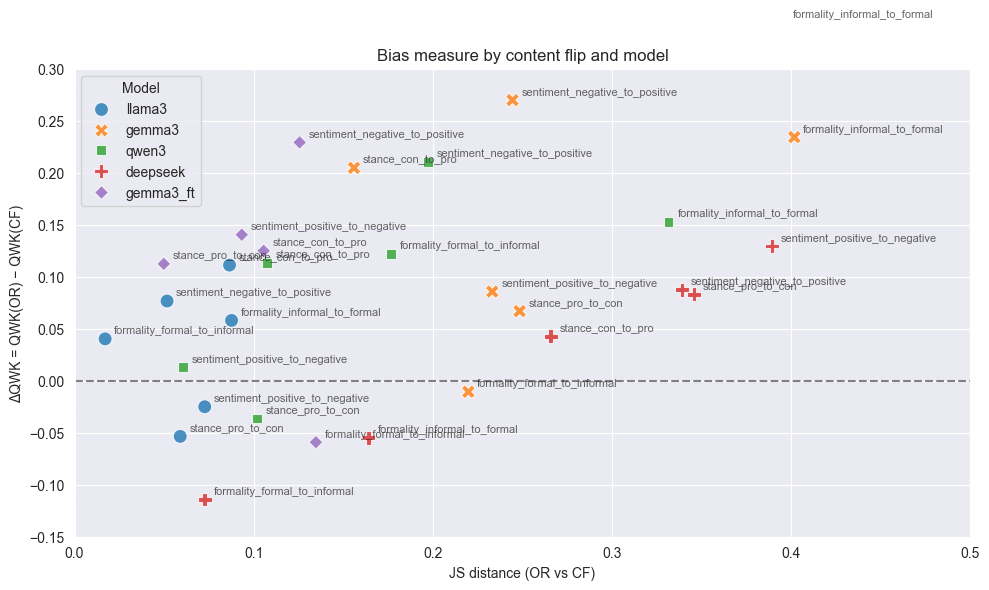

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# flat df with one row per (model, flip)
records = []
for model_name, df in models.items():
    for flip in sorted(df["direction"].unique()):
        q_or, q_cf, q_both = qwk_for_flip(df, flip)
        jsd, js2 = js_for_flip(df, flip)
        records.append({
            "model": model_name,
            "flip":  flip,
            "ΔQWK":  q_or - q_cf,
            "JSdist": jsd
        })
plot_df = pd.DataFrame(records)

# plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=plot_df,
    x="JSdist", y="ΔQWK",
    hue="model",
    style="model",
    s=100,
    alpha=0.8
)

# annotate each point with its flip name
for _, row in plot_df.iterrows():
    plt.text(
        row["JSdist"] + 0.005,
        row["ΔQWK"] + 0.005,
        row["flip"],
        fontsize=8,
        alpha=0.7
    )

plt.xlim(0.0, 0.5)
plt.ylim(-0.150, 0.3)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("JS distance (OR vs CF)")
plt.ylabel("ΔQWK = QWK(OR) − QWK(CF)")
plt.title("Bias measure by content flip and model")
plt.legend(title="Model")
plt.tight_layout()

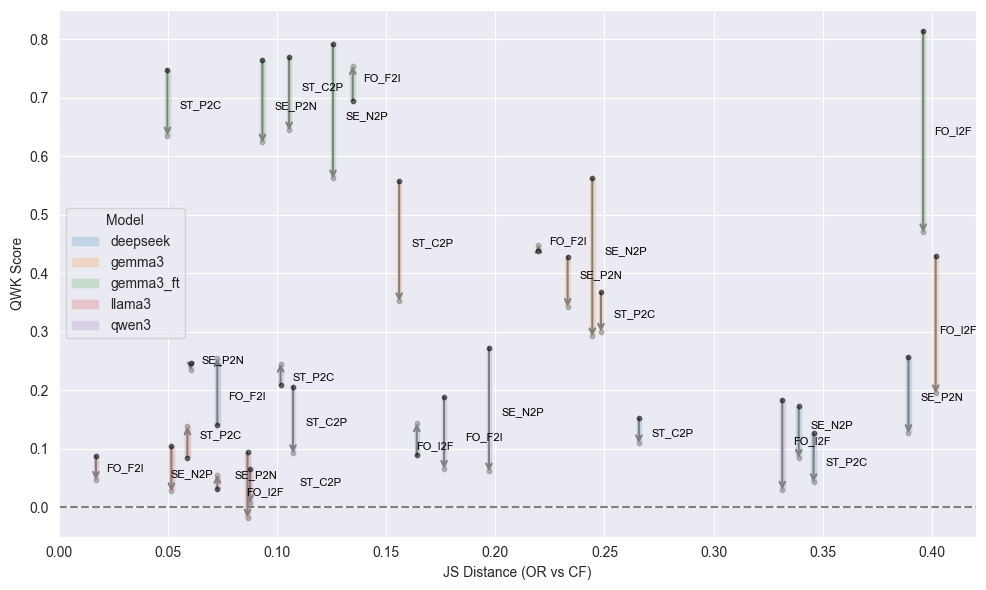

In [279]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
import matplotlib.collections as mcoll
import matplotlib.transforms as mtrans

# translation map
label_map = {
    'stance_pro_to_con':             'ST_P2C',
    'stance_con_to_pro':             'ST_C2P',
    'sentiment_positive_to_negative':'SE_P2N',
    'sentiment_negative_to_positive':'SE_N2P',
    'formality_formal_to_informal':  'FO_F2I',
    'formality_informal_to_formal':  'FO_I2F'
}

# 1) build plot_df with both q_or & q_cf
records = []
for model_name, df_model in models.items():
    for flip in sorted(df_model["direction"].unique()):
        q_or, q_cf, _ = qwk_for_flip(df_model, flip)
        jsd, _        = js_for_flip(df_model, flip)
        records.append({
            "model":  model_name,
            "flip":   flip,
            "JSdist": jsd,
            "q_or":   q_or,
            "q_cf":   q_cf,
        })
plot_df = pd.DataFrame(records)

# 1b) add the short‐label column
plot_df['flip_label'] = plot_df['flip'].map(label_map).fillna(plot_df['flip'])

# 2) set up the figure & axes
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.003

# 3) draw floating bars, arrows, and endpoint dots
for model_name, group in plot_df.groupby("model"):
    group = group.sort_values("JSdist")
    bars = ax.bar(
        x=group["JSdist"],
        height=group["q_cf"] - group["q_or"],
        bottom=group["q_or"],
        width=bar_width,
        alpha=0.2,
        label=model_name
    )

    for bar, (_, row) in zip(bars, group.iterrows()):
        x, y0, y1 = row["JSdist"], row["q_or"], row["q_cf"]
        if y1 != y0:
            ax.annotate(
                "",
                xy=(x, y1),
                xytext=(x, y0),
                arrowprops=dict(
                    arrowstyle="->",
                    color="gray",
                    lw=1.5,
                    shrinkA=0, shrinkB=0
                ),
                annotation_clip=False
            )
        else:
            ax.plot(x, y0, marker="o", color="black", markersize=5, zorder=4)

    # endpoint dots
    ax.scatter(group["JSdist"], group["q_or"], color="black", s=10, zorder=5, alpha=0.5)
    ax.scatter(group["JSdist"], group["q_cf"], color="gray", s=10, zorder=5, alpha=0.5)

# collect bars and dots to avoid
bar_artists = [patch for cont in ax.containers for patch in cont.patches]
dot_artists = [col for col in ax.collections
               if isinstance(col, mcoll.PathCollection)]

offset = mtrans.ScaledTranslation(4/72, 0, fig.dpi_scale_trans)

texts = []
for _, row in plot_df.iterrows():
    y_mid = 0.5 * (row['q_or'] + row['q_cf'])
    txt = ax.text(row['JSdist'], y_mid, row['flip_label'],
                  transform=ax.transData + offset,
                  va='center', fontsize=8, color="black")
    texts.append(txt)

adjust_text(
    texts,
    ax=ax,
    add_objects=bar_artists,          # repel rectangles (bars)
    add_points=dot_artists,           # repel scatter points
    expand_objects=(1.2, 1.2),        # 20 % padding around bars
    expand_points=(1.4, 1.4),         # 40 % padding around dots
    force_objects=(0.5, 0.5),         # push off bars a bit
    force_points=(0.8, 0.8),          # push harder off dots
    only_move={'text': 'x'},          # slide horizontally only
    lim=400                           # more optimisation passes
)

# 5) save
ax.axhline(0, color="gray", linestyle="--")
ax.axvline(0, color="gray", linestyle="--")
ax.set_xlim(0.0, 0.42)
ax.set_ylim(-0.05, 0.85)
ax.set_xlabel("JS Distance (OR vs CF)")
ax.set_ylabel("QWK Score")
#ax.set_title("Change in QWK vs JS Distance by Flip & Model")
ax.legend(title="Model")
plt.tight_layout()
fig.savefig("plots/qwk_or_cf_persuade.pdf",
            format="pdf",
            bbox_inches="tight")